In [26]:
import pandas as pd
import numpy as np
import re
import yfinance as yf
import datetime
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline

[*********************100%***********************]  1 of 1 completed


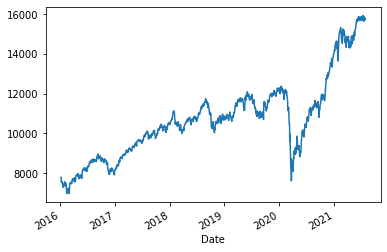

In [3]:
#data = yf.download('BHARATRAS.NS','2016-01-01','2021-08-01')
data = yf.download('^NSEI','2016-01-01','2021-08-01')
# Plot the close price of the AAPL
data['Adj Close'].plot()
#data['Close'].plot()
plt.show()

In [3]:
import pandas as pd
tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP']

# Fetch the data
data = yf.download(tickers_list,'2015-1-1')['Adj Close']
#data = yf.download("SPY AAPL MSFT",'2015-1-1',group_by = 'ticker',threads = True)#['Close']
#data = yf.download(tickers_list,'2015-1-1',group_by = 'ticker',threads = True)#['Close']

# Print first 5 rows of the data
print(data.shape)
print(data.head())

[*********************100%***********************]  6 of 6 completed
(1767, 6)
                 AAPL        AXP          BA         IBM         MU        WMT
Date                                                                          
2014-12-31  24.983650  83.574028  113.683441  113.757866  34.923893  73.371567
2015-01-02  24.745996  83.556053  113.657204  114.906487  34.664536  73.388664
2015-01-05  24.048866  81.346336  112.870049  113.098465  33.696918  73.175079
2015-01-06  24.051125  79.612717  111.540627  110.659386  32.789158  73.738945
2015-01-07  24.388378  81.351463  113.272377  109.936142  32.021049  75.695396


In [4]:
df_analysis = pd.read_csv('df_validations_2021.csv').set_index('Unnamed: 0')
df_analysis.head(4)

,Tikr_x,Sales_yr_1,Sales_yr_2,Sales_yr_3,Sales_yr_4,Sales_yr_5,Sales_yr_2_YoY,Sales_yr_3_YoY,Sales_yr_4_YoY,Sales_yr_5_YoY,...,xgb_label,rf_label,RandomForest_Bucket,XgBoost_Bucket,LGBM_Bucket,rf_decile,lgb_decile,xgb_decile,Return_AD,AvgScore
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
834,NBIFIN,3.83,100.89,5.73,6.29,14.38,2534.203655,-94.320547,9.773124,128.616852,...,1,1,Bin 91-100,Bin 81-90,Bin 91-100,Decile_10,Decile_10,Decile_10,50.413432,0.942238
516,HONAUT,2188.00,2410.00,2690.00,3175.00,3290.00,10.146252,11.618257,18.029740,3.622047,...,1,1,Bin 91-100,Bin 71-80,Bin 91-100,Decile_10,Decile_10,Decile_10,117.438640,0.899618
582,IPCALAB,2804.00,3102.00,3193.00,3606.00,4338.00,10.627675,2.933591,12.934544,20.299501,...,1,1,Bin 91-100,Bin 71-80,Bin 81-90,Decile_10,Decile_10,Decile_10,205.182103,0.874483
1075,SEAMECLTD,328.00,208.00,194.00,304.00,365.00,-36.585366,-6.730769,56.701031,20.065789,...,1,1,Bin 91-100,Bin 71-80,Bin 91-100,Decile_10,Decile_10,Decile_10,150.725863,0.864494


In [5]:
df_analysis['Avg_Score'] = df_analysis[['lgb_score','xgb_score','rf_score']].mean(axis=1)
df_analysis[['lgb_score','xgb_score','rf_score','Avg_Score']].head()

,lgb_score,xgb_score,rf_score,Avg_Score
Unnamed: 0,,,,
834,0.962048,0.864665,1.00,0.942238
516,0.934950,0.763904,1.00,0.899618
582,0.867192,0.776255,0.98,0.874483
1075,0.927462,0.756021,0.91,0.864494
1010,0.885738,0.690750,0.98,0.852163


In [10]:
bins = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
labels = ["Bin 1-10","Bin 11-20","Bin 21-30","Bin 31-40","Bin 41-50","Bin 51-60","Bin 61-70","Bin 71-80","Bin 81-90","Bin 91-100"]
df_analysis['Main_decile'] = pd.qcut(df_analysis['Avg_Score'], 10, labels=False)+1
df_analysis['Main_decile'] = 'Decile_' + df_analysis['Main_decile'].astype(str).str.pad(2,fillchar='0')
df_analysis['Main_Bucket'] = pd.cut(df_analysis['Avg_Score'], bins, labels = labels,include_lowest = True)

# Performance Based Decile
df_analysis['Return_Norm'] = (df_analysis['Return'] - df_analysis['Return'].min()) / (df_analysis['Return'].max() - df_analysis['Return'].min())
df_analysis['Performance_decile'] = pd.qcut(df_analysis['Return_Norm'], 10, labels=False)+1
df_analysis['Performance_decile'] = 'Decile_' + df_analysis['Performance_decile'].astype(str).str.pad(2,fillchar='0')
df_analysis['Performance_Bucket'] = pd.cut(df_analysis['Return_Norm'], bins, labels = labels,include_lowest = True)


In [12]:
#df_analysis['Main_Bucket'].value_counts()
df_analysis['Performance_decile'].value_counts()
# There are approx 100 shares in top 3 buckets

Decile_02    137
Decile_08    137
Decile_01    137
Decile_04    137
Decile_07    137
Decile_05    137
Decile_03    137
Decile_10    137
Decile_09    137
Decile_06    136
Name: Performance_decile, dtype: int64

In [8]:
df_analysis['Main_decile'].value_counts()
# 137 shares in the top decile 

Decile_09    137
Decile_04    137
Decile_05    137
Decile_08    137
Decile_01    137
Decile_03    137
Decile_07    137
Decile_02    137
Decile_10    137
Decile_06    136
Name: Main_decile, dtype: int64

In [37]:
# What is the distribution of Performance decile in Main Decile, 
# How many top performing stocks were part of 

df_heatmap_count = pd.pivot_table(df_analysis, index=['Main_decile'], columns=['Performance_decile'], values=['Return'], aggfunc='count')
df_heatmap_avg = pd.pivot_table(df_analysis, index=['Main_decile'], columns=['Performance_decile'], values=['Return'], aggfunc='mean')
df_heatmap_sum = pd.pivot_table(df_analysis, index=['Main_decile'], columns=['Performance_decile'], values=['Return'], aggfunc='sum')
df_heatmap_sum
#sns.heatmap(df_heatmap_avg, annot=False)

Return                                          \
Performance_decile Decile_01 Decile_02 Decile_03 Decile_04 Decile_05   
Main_decile                                                            
Decile_01          -3,654.27 -1,354.05   -888.99   -248.90    -94.73   
Decile_02          -2,046.55 -1,152.35   -782.57   -468.73   -146.88   
Decile_03          -1,451.69 -1,126.85   -724.79   -415.52   -233.92   
Decile_04          -1,490.28   -904.75   -730.16   -460.93   -209.94   
Decile_05            -694.22   -925.87   -639.28   -538.90   -239.46   
Decile_06            -596.19   -974.89   -323.73   -422.47   -158.61   
Decile_07            -552.43   -456.70   -466.33   -313.03   -185.81   
Decile_08             -69.27   -401.62   -381.02   -279.30    -91.42   
Decile_09                nan   -101.03   -149.84    -98.81     -6.37   
Decile_10                nan       nan       nan       nan       nan   

                                                                      
Performance_decile Decile_06 Decile_07 Decile_08 Decile_09 Decile_10  
Main_decile                                                           
Decile_01              66.88     58.62     35.01     87.34       nan  
Decile_02              42.58    312.30    212.32    106.74       nan  
Decile_03              55.40    293.17    246.13    306.66    159.96  
Decile_04             107.09    367.11    296.26    201.13       nan  
Decile_05              93.76    311.65    127.59    261.42  2,278.11  
Decile_06              74.45    547.98    674.68    594.48    405.26  
Decile_07              92.66    641.87    827.44    685.98  4,574.48  
Decile_08             143.82    514.51  1,113.66  1,354.63  4,317.85  
Decile_09               9.96    133.63  1,494.70  3,994.83 14,097.27  
Decile_10              12.08       nan  1,386.97  4,276.67 15,430.15

In [38]:
# Lets pick up top 3 buckets and crete portfolio out of it
#selected_tikrs = df_analysis['Tikr_x'][df_analysis['Main_Bucket'].isin(['Bin 91-100','Bin 81-90','Bin 71-80'])].to_list()
# # Bins based filtering
# selected_tikrs = df_analysis['Tikr_x'][df_analysis['Main_Bucket'].isin(['Bin 91-100','Bin 81-90'])].to_list()
# DEcile based filtering
#selected_tikrs = df_analysis['Tikr_x'][df_analysis['Main_decile'].isin(['Decile_10'])].to_list()
selected_tikrs = df_analysis['Tikr_x'][df_analysis['Main_decile'].isin(['Decile_10','Decile_09'])].to_list()
selected_tikrs = [s + '.NS' for s in selected_tikrs]
selected_tikrs.append('^NSEI')
selected_tikrs

['NBIFIN.NS',
 'HONAUT.NS',
 'IPCALAB.NS',
 'SEAMECLTD.NS',
 'REMSONSIND.NS',
 'NTPC.NS',
 'DMART.NS',
 'IOLCP.NS',
 'BHARATRAS.NS',
 'AAVAS.NS',
 'DEEPAKNTR.NS',
 'AUBANK.NS',
 'RELAXO.NS',
 'JKCEMENT.NS',
 'PNCINFRA.NS',
 'SRF.NS',
 'PRIMESECU.NS',
 'MAGADSUGAR.NS',
 'DIXON.NS',
 'ALKYLAMINE.NS',
 'LTTS.NS',
 'HDFCBANK.NS',
 'GLOBUSSPR.NS',
 'MUTHOOTFIN.NS',
 'FACT.NS',
 'ESABINDIA.NS',
 'ASTRAZEN.NS',
 'GOKEX.NS',
 'BALRAMCHIN.NS',
 'CAMLINFINE.NS',
 'SHREECEM.NS',
 'MPHASIS.NS',
 'KEI.NS',
 'MFSL.NS',
 'REDINGTON.NS',
 'TRIVENI.NS',
 'ULTRACEMCO.NS',
 'TIMKEN.NS',
 'ATUL.NS',
 'MANAPPURAM.NS',
 'USHAMART.NS',
 'FORTIS.NS',
 'HATSUN.NS',
 'REFEX.NS',
 'CHAMBLFERT.NS',
 'NESTLEIND.NS',
 'CIPLA.NS',
 'POLYPLEX.NS',
 'ADANIGAS.NS',
 'GRSE.NS',
 'GMMPFAUDLR.NS',
 'IGL.NS',
 'BANSWRAS.NS',
 'CYBERTECH.NS',
 'GODREJPROP.NS',
 'DRREDDY.NS',
 'JUBILANT.NS',
 'ABBOTINDIA.NS',
 'CANTABIL.NS',
 'CREDITACC.NS',
 'ASTEC.NS',
 'TORNTPHARM.NS',
 'POWERGRID.NS',
 'SUPREMEIND.NS',
 'GSPL.NS',
 'BAJF

In [14]:
# #start_value = yf.download(tickers_list,'2021-1-1')['Adj Close']
# #data = yf.download(tickers_list,'2015-1-1')['Adj Close']
# #ibm = pdr.get_data_yahoo(tickers_list, start=datetime(2012, 1, 1), end=datetime(2012, 1, 10))
# ibm = yf.download(tickers_list, start=datetime(2012, 1, 1), end=datetime(2012, 1, 4),group_by='ticker',auto_adjust = True)
# #data = yf.download(tickers_list, start=datetime(2015, 1, 1), end=datetime(2015, 1, 4),group_by='ticker',auto_adjust = True)
# #data

In [39]:
df_trend = yf.download(selected_tikrs,'2021-1-1')['Adj Close']
df_trend

[*********************100%***********************]  275 of 275 completed

3 Failed downloads:
- ADANIGAS.NS: No data found, symbol may be delisted
- ORIENTREF.NS: No data found, symbol may be delisted
- JUBILANT.NS: No data found, symbol may be delisted


,AARTIDRUGS.NS,AARTIIND.NS,AAVAS.NS,ABBOTINDIA.NS,ADANIENT.NS,ADANIGAS.NS,ADANIPORTS.NS,ADANIPOWER.NS,ADANITRANS.NS,ADFFOODS.NS,...,VINATIORGA.NS,VOLTAS.NS,VSSL.NS,WELINV.NS,WELSPUNIND.NS,WHIRLPOOL.NS,XPROINDIA.NS,ZENITHEXPO.NS,ZYDUSWELL.NS,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,735.00,628.57,"1,720.65","15,606.41",490.82,nan,500.34,50.15,434.25,638.89,...,"1,213.68",823.15,112.68,365.30,68.35,"2,608.53",33.75,78.80,"2,053.10",nan
2021-01-04,739.75,639.32,"1,867.05","15,529.15",494.17,nan,495.43,50.20,441.20,646.91,...,"1,227.39",837.56,118.29,363.55,71.74,"2,593.71",35.40,81.30,"2,138.61","14,132.90"
2021-01-05,720.90,666.82,"2,021.70","15,467.36",494.07,nan,495.98,49.80,437.95,639.38,...,"1,217.57",828.99,124.21,362.05,72.39,"2,588.38",36.10,81.55,"2,103.97","14,199.50"
2021-01-06,719.65,643.55,"1,910.30","15,413.09",490.57,nan,493.34,50.70,454.25,630.61,...,"1,317.75",860.62,130.37,364.60,70.49,"2,537.44",37.90,79.40,"2,075.95","14,146.25"
2021-01-07,727.75,638.19,"1,891.30","15,299.11",517.76,nan,510.28,51.00,454.65,630.86,...,"1,298.11",872.70,128.09,370.80,73.79,"2,479.78",39.75,80.80,"2,052.16","14,137.35"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,544.90,"1,004.60","2,616.05","19,485.65","1,709.45",nan,730.30,99.70,"1,740.85",807.25,...,"1,988.10","1,219.15",253.55,277.00,145.50,"1,761.75",937.30,90.40,"1,884.50","17,354.05"
2022-01-03,544.60,"1,017.35","2,627.35","19,285.10","1,717.15",nan,736.60,101.30,"1,731.10",839.70,...,"2,054.70","1,233.20",258.20,273.95,147.25,"1,775.25",936.90,93.35,"1,873.65","17,625.70"
2022-01-04,538.00,992.00,"2,771.00","18,986.20","1,719.00",nan,739.25,100.55,"1,754.95",857.10,...,"2,073.35","1,245.50",259.30,284.50,156.95,"1,781.90",939.60,93.65,"1,863.65","17,805.25"


In [40]:
df_trend.shape[0]

252

In [41]:
Amount = 50000
pd.options.display.float_format = '{:,.2f}'.format
df_portfolio = pd.DataFrame(df_trend.iloc[1,:])
df_portfolio['Final_Price'] = df_trend.iloc[df_trend.shape[0]-1,:]
df_portfolio.columns = ['Start_Price','Final_Price']
df_portfolio['Quantity'] = np.floor((50000/df_portfolio['Start_Price']))
df_portfolio['Invested'] = df_portfolio['Quantity'] * df_portfolio['Start_Price']
#df_portfolio['Invested'] = df_portfolio['Invested'].apply(lambda x: "${:.1f}k".format((x/1000)))
df_portfolio['Current_Value'] = df_portfolio['Quantity'] * df_portfolio['Final_Price']
df_portfolio['Profit'] = df_portfolio['Current_Value'] - df_portfolio['Invested']
df_portfolio['Profit%'] = (df_portfolio['Profit']/df_portfolio['Invested'])*100
df_portfolio = df_portfolio.reset_index()
df_portfolio.rename(columns={ df_portfolio.columns[0]: "Tikr" }, inplace = True)
df_portfolio


,Tikr,Start_Price,Final_Price,Quantity,Invested,Current_Value,Profit,Profit%
0,AARTIDRUGS.NS,739.75,533.65,67.00,"49,563.25","35,754.55","-13,808.70",-27.86
1,AARTIIND.NS,639.32,984.00,78.00,"49,866.63","76,752.00","26,885.37",53.91
2,AAVAS.NS,"1,867.05","2,874.85",26.00,"48,543.30","74,746.10","26,202.80",53.98
3,ABBOTINDIA.NS,"15,529.15","19,040.00",3.00,"46,587.46","57,120.00","10,532.54",22.61
4,ADANIENT.NS,494.17,"1,690.15",101.00,"49,911.37","170,705.15","120,793.78",242.02
...,...,...,...,...,...,...,...,...
270,WHIRLPOOL.NS,"2,593.71","1,757.80",19.00,"49,280.54","33,398.20","-15,882.34",-32.23
271,XPROINDIA.NS,35.40,"1,035.85","1,412.00","49,984.80","1,462,620.17","1,412,635.36","2,826.13"
272,ZENITHEXPO.NS,81.30,89.45,615.00,"49,999.50","55,011.75","5,012.25",10.02
273,ZYDUSWELL.NS,"2,138.61","1,871.40",23.00,"49,188.06","43,042.20","-6,145.86",-12.49


In [42]:
df_summary = df_portfolio[['Invested','Current_Value','Profit']].sum()
df_summary['Profit%'] = (df_summary['Profit']/df_summary['Invested'])*100
df_summary

Invested        13,434,023.35
Current_Value   27,495,540.51
Profit          14,110,790.41
Profit%                105.04
dtype: float64

In [43]:
df_trend_transposed = df_trend.transpose().reset_index()
#df_trend_transposed.columns[1] = 'Tikr'
df_trend_transposed.rename(columns={ df_trend_transposed.columns[0]: "Tikr" }, inplace = True)
df_trend_transposed = pd.merge(df_trend_transposed,df_portfolio[['Tikr','Quantity']], how='left',left_on=['Tikr'], right_on=['Tikr'])

# Taking the trend of Nifty into a different dataframe
df_trend_nifty = pd.DataFrame(df_trend_transposed.iloc[df_trend_transposed.shape[0]-1,:])
df_trend_nifty.columns = df_trend_nifty.iloc[0]
df_trend_nifty = df_trend_nifty.drop(df_trend_nifty.index[0])

df_trend_transposed
# Multiplying the quantity by value
#df_trend_transposed = df_trend_transposed.iloc[:,1:-1] * df_trend_transposed.iloc[:,-1]
df_trend_transposed = df_trend_transposed.iloc[:,1:-1].multiply(df_trend_transposed['Quantity'], axis='index')
df_trend_sum = df_trend_transposed.sum()

In [44]:
print(df_trend_sum.shape)
print(df_trend_nifty.shape)
#df_trend_nifty['Portfolio'] = df_trend_sum
#df_trend_nifty.head()

(252,)
(253, 1)


In [23]:
# #df_trend_compare.iloc[1,:]
# #df_trend_compare
# #df_trend_compare.at[1,1] ##/(df_trend_compare.iloc[1,1])
# df_trend_compare.iloc[1, df_trend_compare.columns.get_loc("Portfolio")]/df_trend_compare.iloc[1, df_trend_compare.columns.get_loc("^NSEI")]

In [45]:
#pd.merge(df_trend_nifty,pd.DataFrame(df_trend_sum,columns=['Portfolio']))
df_trend_compare = pd.concat([df_trend_nifty.iloc[:-1,:], pd.DataFrame(df_trend_sum,columns=['Portfolio'])], axis=1)
multiplier = df_trend_compare.iloc[1, df_trend_compare.columns.get_loc("Portfolio")]/df_trend_compare.iloc[1, df_trend_compare.columns.get_loc("^NSEI")]
df_trend_compare['Nifty_Adjusted'] = df_trend_compare['^NSEI'] * multiplier
df_trend_compare

,^NSEI,Portfolio,Nifty_Adjusted
2021-01-01,NaN,"13,217,083.33",NaN
2021-01-04,"14,132.90","13,434,023.35","13,434,023.35"
2021-01-05,"14,199.50","13,547,734.28","13,497,329.59"
2021-01-06,"14,146.25","13,574,047.89","13,446,712.82"
2021-01-07,"14,137.35","13,675,374.19","13,438,252.55"
...,...,...,...
2021-12-31,"17,354.05","26,680,792.94","16,495,886.69"
2022-01-03,"17,625.70","27,084,858.18","16,754,102.01"
2022-01-04,"17,805.25","27,349,644.69","16,924,773.94"
2022-01-05,"17,925.25","27,497,340.01","17,038,839.90"


<AxesSubplot:>

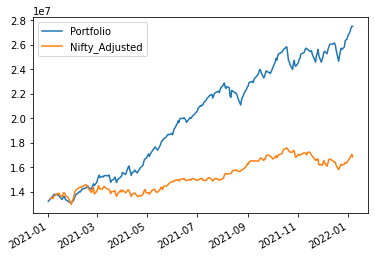

In [46]:
df_trend_compare[['Portfolio','Nifty_Adjusted']].plot()

In [47]:
df_valid_out = pd.concat([df_trend_compare[['Portfolio','Nifty_Adjusted']].iloc[1,:], df_trend_compare[['Portfolio','Nifty_Adjusted']].iloc[df_trend_compare.shape[0]-1,:]], axis=1)
df_valid_out['Profit'] = df_valid_out.iloc[:,1] - df_valid_out.iloc[:,0]
df_valid_out['Profit%'] = (df_valid_out['Profit']/df_valid_out.iloc[:,0])*100
df_valid_out

,2021-01-04 00:00:00,2022-01-06 00:00:00,Profit,Profit%
Portfolio,"13,434,023.35","27,495,540.51","14,061,517.16",104.67
Nifty_Adjusted,"13,434,023.35","16,850,204.07","3,416,180.72",25.43
